**Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

**Load Dataset**

In [ ]:
df = pd.read_csv('/content/Kemiskinan di Indonesia.csv')
df.head()

,Provinsi,Kab/Kota,Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),Rata-rata Lama Sekolah Penduduk 15+ (Tahun),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),Indeks Pembangunan Manusia,Umur Harapan Hidup (Tahun),Persentase rumah tangga yang memiliki akses terhadap sanitasi layak,Persentase rumah tangga yang memiliki akses terhadap air minum layak,Tingkat Pengangguran Terbuka,Tingkat Partisipasi Angkatan Kerja,PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah),Klasifikasi Kemiskinan
0,ACEH,Simeulue,"18,98","9,48",7148,"66,41","65,28","71,56","87,45","5,71","71,15",1648096,0
1,ACEH,Aceh Singkil,"20,36","8,68",8776,"69,22","67,43","69,56","78,58","8,36","62,85",1780419,1
2,ACEH,Aceh Selatan,"13,18","8,88",8180,"67,44","64,4","62,55","79,65","6,46","60,85",4345784,0
3,ACEH,Aceh Tenggara,"13,41","9,67",8030,"69,44","68,22","62,71","86,71","6,43","69,62",3487157,0
4,ACEH,Aceh Timur,"14,45","8,21",8577,"67,83","68,74","66,75","83,16","7,13","59,48",8433526,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 13 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Provinsi                                                              514 non-null    object
 1   Kab/Kota                                                              514 non-null    object
 2   Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)       514 non-null    object
 3   Rata-rata Lama Sekolah Penduduk 15+ (Tahun)                           514 non-null    object
 4   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)          514 non-null    int64 
 5   Indeks Pembangunan Manusia                                            514 non-null    object
 6   Umur Harapan Hidup (Tahun)                                            514 non-null    object
 7   Persenta

In [ ]:
df.describe()

,Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah),Klasifikasi Kemiskinan
count,514.000000,5.140000e+02,514.000000
mean,10324.787938,2.196408e+07,0.120623
std,2717.144186,4.790492e+07,0.326005
min,3976.000000,1.474850e+05,0.000000
25%,8574.000000,3.654292e+06,0.000000
50%,10196.500000,8.814926e+06,0.000000
75%,11719.000000,1.973510e+07,0.000000
max,23888.000000,4.600810e+08,1.000000


# Prepocessing Data

**Missing Value**

In [ ]:
df.isna()
df.isna().sum()

,0
Provinsi,0
Kab/Kota,0
Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),0
Rata-rata Lama Sekolah Penduduk 15+ (Tahun),0
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),0
Indeks Pembangunan Manusia,0
Umur Harapan Hidup (Tahun),0
Persentase rumah tangga yang memiliki akses terhadap sanitasi layak,0
Persentase rumah tangga yang memiliki akses terhadap air minum layak,0
Tingkat Pengangguran Terbuka,0


**Cek data duplikat**

In [ ]:
df.duplicated().sum()

0

**Ubah nama kolom**

In [ ]:
df = df.rename(columns={
    'Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)': 'P0_Persen',
    'Rata-rata Lama Sekolah Penduduk 15+ (Tahun)': 'Rata_rata_Lama_Sekolah',
    'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)': 'Pengeluaran_per_Kapita',
    'Indeks Pembangunan Manusia': 'IPM',
    'Umur Harapan Hidup (Tahun)': 'Umur_Harapan_Hidup',
    'Persentase rumah tangga yang memiliki akses terhadap sanitasi layak': 'Akses_Sanitasi_Layak',
    'Persentase rumah tangga yang memiliki akses terhadap air minum layak': 'Akses_Air_Minum_Layak',
    'Tingkat Pengangguran Terbuka': 'Pengangguran_Terbuka',
    'Tingkat Partisipasi Angkatan Kerja': 'Partisipasi_Angkatan_Kerja',
    'PDRB atas Dasar Harga Konstan menurut Pengeluaran (Rupiah)': 'PDRB_Harga_Konstan',
    'Klasifikasi Kemiskinan': 'Klasifikasi_Kemiskinan'
})
df.head()

,Provinsi,Kab/Kota,P0_Persen,Rata_rata_Lama_Sekolah,Pengeluaran_per_Kapita,IPM,Umur_Harapan_Hidup,Akses_Sanitasi_Layak,Akses_Air_Minum_Layak,Pengangguran_Terbuka,Partisipasi_Angkatan_Kerja,PDRB_Harga_Konstan,Klasifikasi_Kemiskinan
0,ACEH,Simeulue,"18,98","9,48",7148,"66,41","65,28","71,56","87,45","5,71","71,15",1648096,0
1,ACEH,Aceh Singkil,"20,36","8,68",8776,"69,22","67,43","69,56","78,58","8,36","62,85",1780419,1
2,ACEH,Aceh Selatan,"13,18","8,88",8180,"67,44","64,4","62,55","79,65","6,46","60,85",4345784,0
3,ACEH,Aceh Tenggara,"13,41","9,67",8030,"69,44","68,22","62,71","86,71","6,43","69,62",3487157,0
4,ACEH,Aceh Timur,"14,45","8,21",8577,"67,83","68,74","66,75","83,16","7,13","59,48",8433526,0


**Mengubah Tipe Data Objek ke Float**

In [ ]:
df['P0_Persen'] = df['P0_Persen'].astype(str).str.replace(',', '.').astype(float)
df['Rata_rata_Lama_Sekolah'] = df['Rata_rata_Lama_Sekolah'].astype(str).str.replace(',', '.').astype(float)
df['IPM'] = df['IPM'].astype(str).str.replace(',', '.').astype(float)
df['Umur_Harapan_Hidup'] = df['Umur_Harapan_Hidup'].astype(str).str.replace(',', '.').astype(float)
df['Akses_Sanitasi_Layak'] = df['Akses_Sanitasi_Layak'].astype(str).str.replace(',', '.').astype(float)
df['Akses_Air_Minum_Layak'] = df['Akses_Air_Minum_Layak'].astype(str).str.replace(',', '.').astype(float)
df['Pengangguran_Terbuka'] = df['Pengangguran_Terbuka'].astype(str).str.replace(',', '.').astype(float)
df['Partisipasi_Angkatan_Kerja'] = df['Partisipasi_Angkatan_Kerja'].astype(str).str.replace(',', '.').astype(float)

**Mengubah Tipe Data Float ke Integer**

In [ ]:
df['Klasifikasi_Kemiskinan'] = df['Klasifikasi_Kemiskinan'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Provinsi                    514 non-null    object 
 1   Kab/Kota                    514 non-null    object 
 2   P0_Persen                   514 non-null    float64
 3   Rata_rata_Lama_Sekolah      514 non-null    float64
 4   Pengeluaran_per_Kapita      514 non-null    int64  
 5   IPM                         514 non-null    float64
 6   Umur_Harapan_Hidup          514 non-null    float64
 7   Akses_Sanitasi_Layak        514 non-null    float64
 8   Akses_Air_Minum_Layak       514 non-null    float64
 9   Pengangguran_Terbuka        514 non-null    float64
 10  Partisipasi_Angkatan_Kerja  514 non-null    float64
 11  PDRB_Harga_Konstan          514 non-null    int64  
 12  Klasifikasi_Kemiskinan      514 non-null    int64  
dtypes: float64(8), int64(3), object(2)


**Drop Kolom yang tidak dibutuhkan**

In [ ]:
# Drop kolom 'Provinsi' dan 'Kab/Kota'
df = df.drop(['Provinsi', 'Kab/Kota'], axis=1)

# Tampilkan DataFrame setelah kolom di-drop
print(df.head())

   P0_Persen  Rata_rata_Lama_Sekolah  Pengeluaran_per_Kapita    IPM  \
0      18.98                    9.48                    7148  66.41   
1      20.36                    8.68                    8776  69.22   
2      13.18                    8.88                    8180  67.44   
3      13.41                    9.67                    8030  69.44   
4      14.45                    8.21                    8577  67.83   

   Umur_Harapan_Hidup  Akses_Sanitasi_Layak  Akses_Air_Minum_Layak  \
0               65.28                 71.56                  87.45   
1               67.43                 69.56                  78.58   
2               64.40                 62.55                  79.65   
3               68.22                 62.71                  86.71   
4               68.74                 66.75                  83.16   

   Pengangguran_Terbuka  Partisipasi_Angkatan_Kerja  PDRB_Harga_Konstan  \
0                  5.71                       71.15             1648096   
1 

# **Exploratory Data Analysis (EDA)**

**Melihat jumlah nilai dalam kolom Klasifikasi Kemiskinan**

In [ ]:
df['Klasifikasi_Kemiskinan'].value_counts()

,count
Klasifikasi_Kemiskinan,
0,452
1,62


**Visualisasi jumlah nilai kemiskinan**

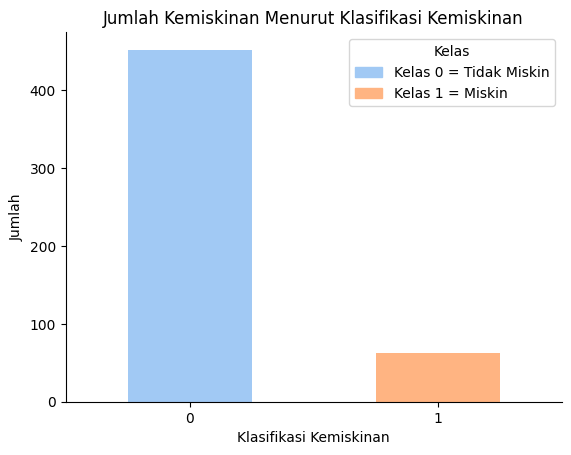

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pastel_colors = sns.color_palette("pastel", len(df['Klasifikasi_Kemiskinan'].unique()))
counts = df.groupby('Klasifikasi_Kemiskinan').size()
ax = counts.plot(kind='bar', color=pastel_colors)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xticks(rotation=0)
plt.xlabel('Klasifikasi Kemiskinan')
plt.ylabel('Jumlah')
plt.title('Jumlah Kemiskinan Menurut Klasifikasi Kemiskinan')
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in pastel_colors]
labels = ['Kelas 0 = Tidak Miskin', 'Kelas 1 = Miskin']
plt.legend(handles=handles, title='Kelas', labels=labels)
plt.show()


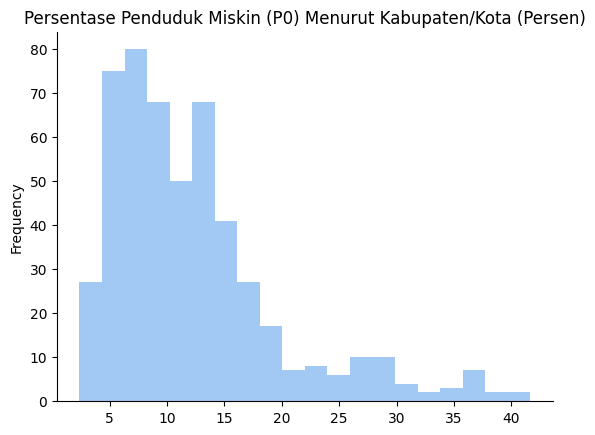

In [ ]:
pastel_colors = sns.color_palette("pastel")
df['P0_Persen'].plot(kind='hist',color=pastel_colors, bins=20, title='Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Visualisasi Per Kolom**

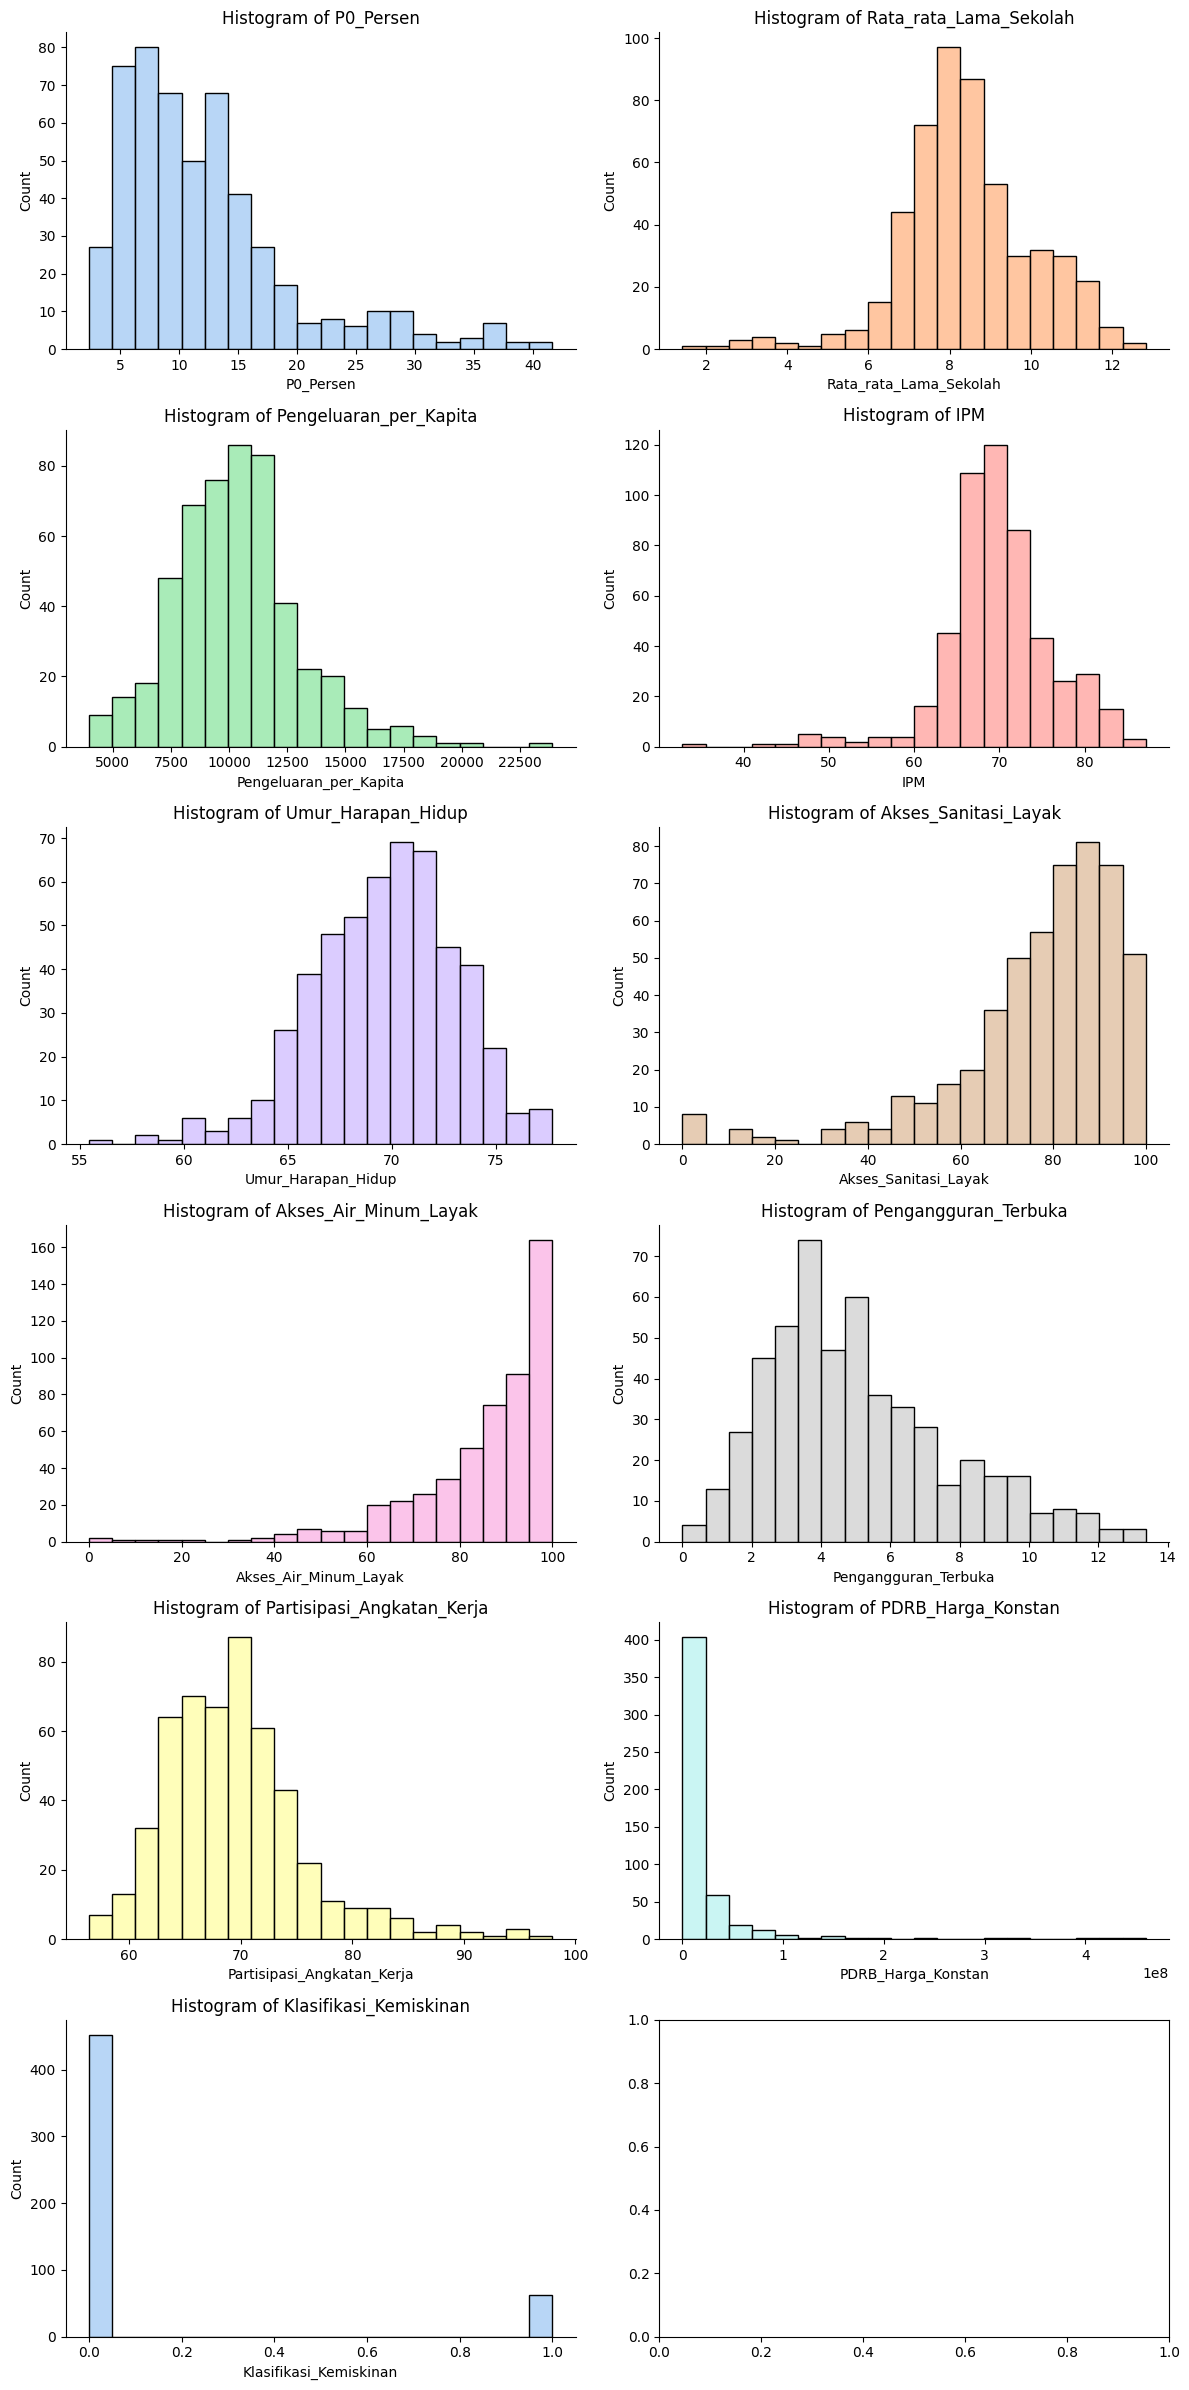

In [ ]:
num_cols = len(df.select_dtypes(include=np.number).columns)
num_rows = int(np.ceil(num_cols / 2))

fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 4))

axes = axes.flatten()

for i, column in enumerate(df.select_dtypes(include=np.number)):
    sns.histplot(df[column], bins=20, color=pastel_colors[i % len(pastel_colors)], ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

**Korelasi Heatmap**

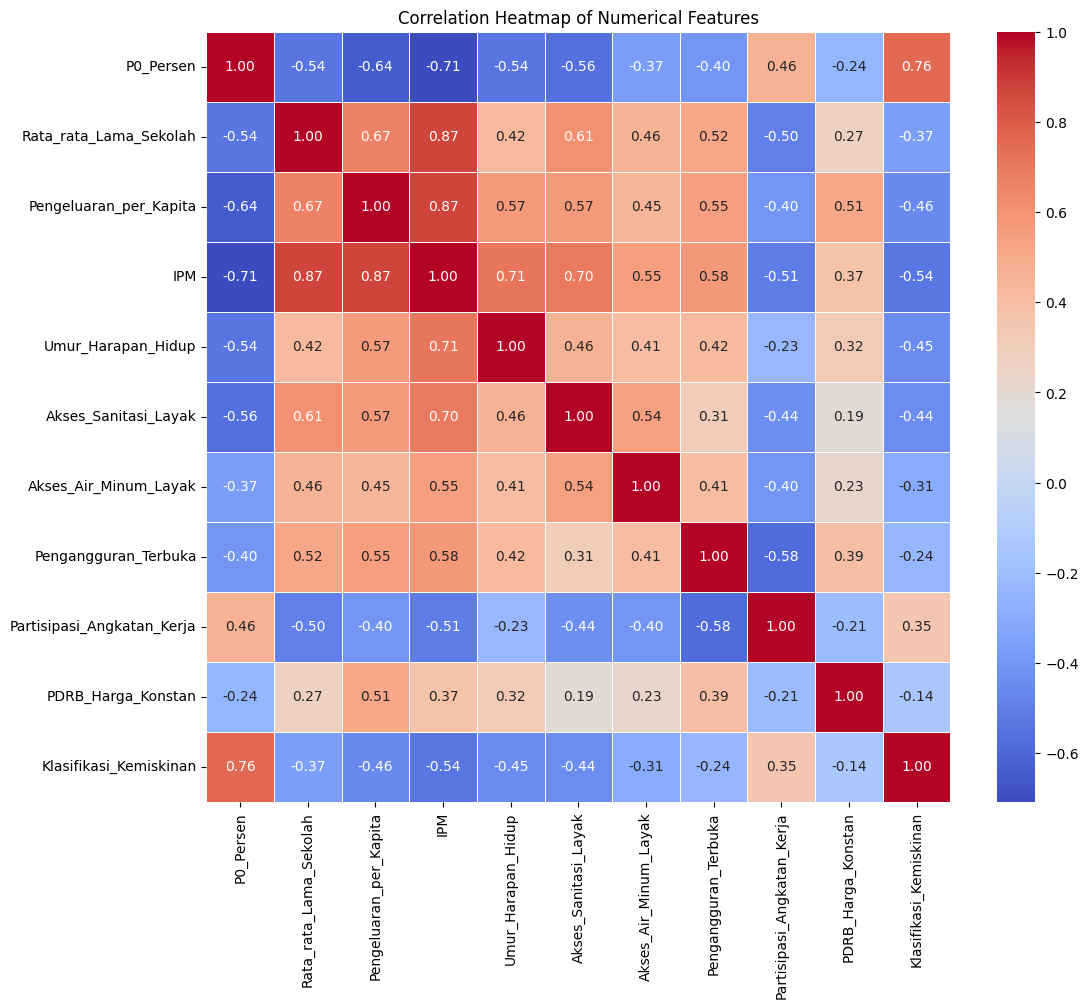

In [ ]:
# Pilih kolom numerik
numerical_cols = ['P0_Persen', 'Rata_rata_Lama_Sekolah', 'Pengeluaran_per_Kapita', 'IPM',
                  'Umur_Harapan_Hidup', 'Akses_Sanitasi_Layak', 'Akses_Air_Minum_Layak',
                  'Pengangguran_Terbuka', 'Partisipasi_Angkatan_Kerja', 'PDRB_Harga_Konstan', 'Klasifikasi_Kemiskinan']

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**Split Data**

In [ ]:
X = df.drop(columns=['Klasifikasi_Kemiskinan'])
y = df['Klasifikasi_Kemiskinan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Jumlah Split data
print("Jumlah data Training:", len(X_train))
print("Jumlah data Testing:", len(X_test))

# Persentase data
print("Persentase data Training:", len(X_train) / (len(X_train) + len(X_test)))
print("Persentase data Testing:", len(X_test) / (len(X_train) + len(X_test)))

Jumlah data Training: 462
Jumlah data Testing: 52
Persentase data Training: 0.8988326848249028
Persentase data Testing: 0.10116731517509728


**Menyeimbangkan Data dengan SMOTE**

In [ ]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Menampilkan distribusi kelas sebelum dan sesudah SMOTE
print("Distribusi sebelum SMOTE:", y.value_counts())
print("Distribusi setelah SMOTE:", pd.Series(y_train).value_counts())

Distribusi sebelum SMOTE: Klasifikasi_Kemiskinan
0    452
1     62
Name: count, dtype: int64
Distribusi setelah SMOTE: Klasifikasi_Kemiskinan
0    408
1    408
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


**Visualisasi distribusi kelas sebelum dan sesudah SMOTE**

<ipython-input-430-bb816802206c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, ax=axes[0], palette="pastel")
<ipython-input-430-bb816802206c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axes[1], palette="pastel")


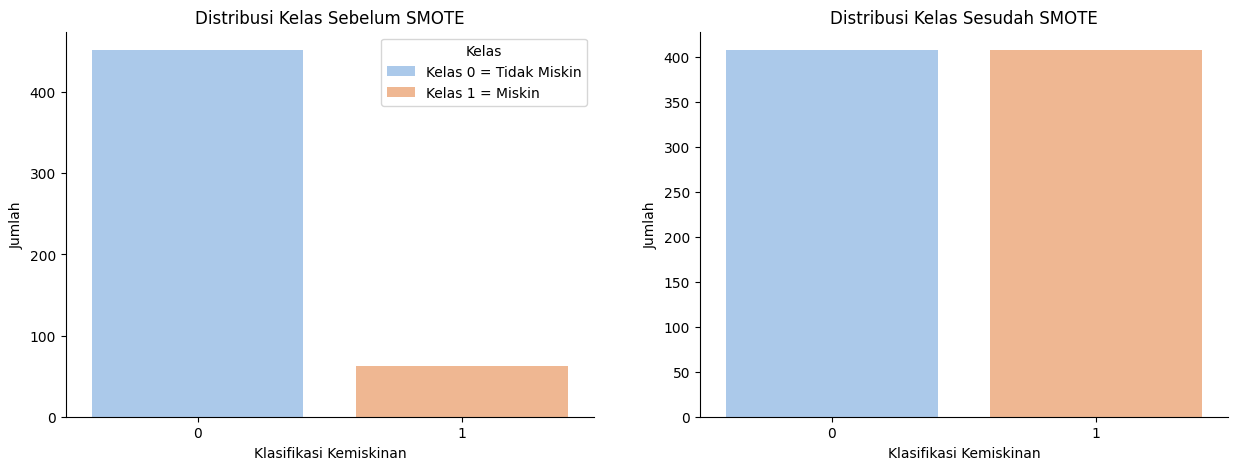

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribusi sebelum SMOTE
sns.countplot(x=y, ax=axes[0], palette="pastel")
axes[0].set_title('Distribusi Kelas Sebelum SMOTE')
axes[0].set_xlabel('Klasifikasi Kemiskinan')
axes[0].set_ylabel('Jumlah')
axes[0].spines[['top', 'right']].set_visible(False)
axes[0].legend(title='Kelas', labels=['Kelas 0 = Tidak Miskin', 'Kelas 1 = Miskin'], loc='upper right')

# Distribusi sesudah SMOTE
sns.countplot(x=y_train, ax=axes[1], palette="pastel")
axes[1].set_title('Distribusi Kelas Sesudah SMOTE')
axes[1].set_xlabel('Klasifikasi Kemiskinan')
axes[1].set_ylabel('Jumlah')
axes[1].spines[['top', 'right']].set_visible(False)

plt.show()

# Membandingkan Model

**Decision Tree**

Accuracy: 0.9230769230769231
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        44
           1       0.67      1.00      0.80         8

    accuracy                           0.92        52
   macro avg       0.83      0.95      0.88        52
weighted avg       0.95      0.92      0.93        52



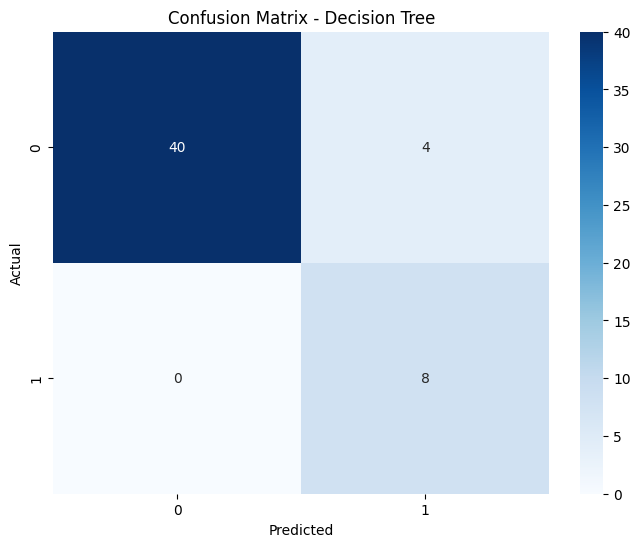

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Membuat prediksi pada set pengujian
y_pred = dt_classifier.predict(X_test)

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Visualisasi dengan Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=dt_classifier.classes_, yticklabels=dt_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9038461538461539
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        44
           1       0.64      0.88      0.74         8

    accuracy                           0.90        52
   macro avg       0.81      0.89      0.84        52
weighted avg       0.92      0.90      0.91        52



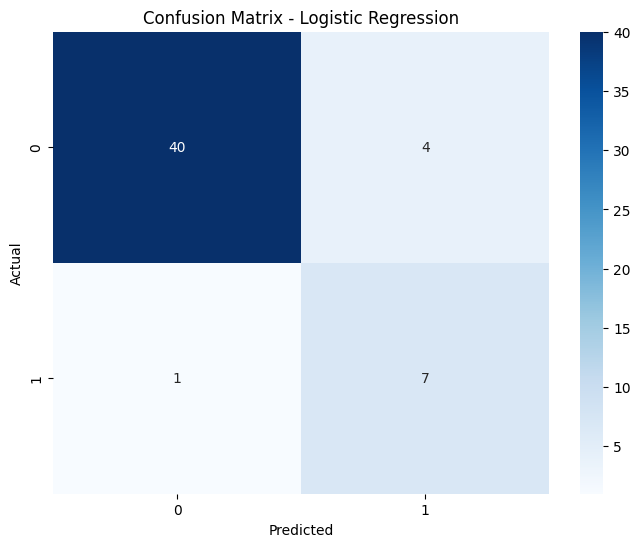

In [ ]:
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Membuat prediksi pada set pengujian
y_pred = logreg_model.predict(X_test)

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Visualisasi dengan Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=logreg_model.classes_, yticklabels=logreg_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()